# Time Series HW

## 1.What scale of measurement applies to timeseries data? Is timeseries data continuous or discrete? Why?


* Time series data falls under **interval** scale of measurement, because there’s no meaningful zero. The difference in time is known and easily calculated.


* A time series is continuous when observations are made continuously through time. A time series is discrete when observations are taken at specific times.


## 2.What does ARIMA stand for? Break down and explain each piece in the name.


**ARIMA - AutoRegressive Integrated MovingAverage** 


* The main goal of time series model is to predict or forecast the future values. ARIMA is one of time series model to do that. ARIMA comes from combining AR and MA models. AR(autoregression) method takes past values to predict the future ones. MA (Moving average) takes past and present errors to predict future values.


* A model with a dth difference to fit in ARMA(p,q) model is called an ARIMA process of order (p,d,q). If no differencing is involved in the model, then it becomes simply an ARMA. 

## 3.Using the data in the temperatures/ folder. Write a function that efficiently converts every column to a different temperature scale: one that is more common than Kelvin.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [7]:
temperature_df=pd.read_csv('temperatures/temperature.csv',parse_dates=['datetime'])
temperature_df.tail()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
45248,2017-11-29 20:00:00,NaN,282.00,NaN,280.82,293.55,292.15,289.54,294.71,285.72,...,290.24,NaN,275.13,288.08,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,282.89,NaN,281.65,295.68,292.74,290.61,295.59,286.45,...,289.24,NaN,274.13,286.02,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,283.39,NaN,282.75,295.96,292.58,291.34,296.25,286.44,...,286.78,NaN,273.48,283.94,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,283.02,NaN,282.96,295.65,292.61,292.15,297.15,286.14,...,284.57,NaN,272.48,282.17,NaN,NaN,NaN,NaN,NaN,NaN
45252,2017-11-30 00:00:00,NaN,282.28,NaN,283.04,294.93,291.40,291.64,297.15,284.70,...,283.42,NaN,271.80,280.65,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#creating a function to convert temperature values into Celcius.

def f(x):
    x = x-273.15
    return x

In [8]:
#using .apply() calling the function 
celsius=temperature_df.iloc[:,1:37].apply(f, axis=1).round(2)
celsius.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.95,NaN,NaN,NaN
1,11.48,8.93,16.33,8.65,18.72,18.38,20.26,23.45,11.97,11.46,...,12.48,15.07,12.68,14.02,34.44,32.32,37.43,31.25,31.25,30.35
2,11.48,8.93,16.32,8.65,18.72,18.38,20.25,23.46,12.00,11.46,...,12.51,15.10,12.68,14.04,34.44,31.16,37.35,31.25,31.25,30.35
3,11.48,8.94,16.31,8.64,18.71,18.39,20.24,23.48,12.08,11.45,...,12.61,15.18,12.70,14.08,34.24,31.13,37.26,31.25,31.25,30.35
4,11.47,8.95,16.30,8.63,18.71,18.40,20.23,23.50,12.16,11.44,...,12.70,15.26,12.71,14.13,34.00,31.09,37.18,31.25,31.25,30.35


In [9]:
#concatenating two dfs, setting axis =1 helps to concatenate horizontically. If we aren't using axis parameter, 
#concatenation will be done in stack manner.

celcius_df=pd.concat([celsius,temperature_df['datetime']], axis=1)
#celcius_df= celcius_df.set_index('datetime')
celcius_df.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,datetime
45248,NaN,8.85,NaN,7.67,20.40,19.00,16.39,21.56,12.57,16.41,...,NaN,1.98,14.93,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-29 20:00:00
45249,NaN,9.74,NaN,8.50,22.53,19.59,17.46,22.44,13.30,17.55,...,NaN,0.98,12.87,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-29 21:00:00
45250,NaN,10.24,NaN,9.60,22.81,19.43,18.19,23.10,13.29,16.56,...,NaN,0.33,10.79,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-29 22:00:00
45251,NaN,9.87,NaN,9.81,22.50,19.46,19.00,24.00,12.99,16.02,...,NaN,-0.67,9.02,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-29 23:00:00
45252,NaN,9.13,NaN,9.89,21.78,18.25,18.49,24.00,11.55,12.03,...,NaN,-1.35,7.50,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-30 00:00:00


## 4.Write a function that efficiently fills in missing values in every column, excluding trailing NANs. That is: if there's temperature data on either side of a timestamp, it should interpolate through it. But if data stopped being collected, your function should leave nans at the end.


In [222]:
#creating a function that fills in missing values, excluding trailing NANs
def interpolate(y):
    for i in y:
        if i!="datetime":
            y[i]= y[i].interpolate(method='pad',axis=0,limit_area='inside')


In [225]:
 #calling function for celsius df           
interpolate(celcius_df)
celcius_df

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,datetime
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35.95,NaN,NaN,NaN,2012-10-01 12:00:00
1,11.48,8.93,16.33,8.65,18.72,18.38,20.26,23.45,11.97,11.46,...,15.07,12.68,14.02,34.44,32.32,37.43,31.25,31.25,30.35,2012-10-01 13:00:00
2,11.48,8.93,16.32,8.65,18.72,18.38,20.25,23.46,12.00,11.46,...,15.10,12.68,14.04,34.44,31.16,37.35,31.25,31.25,30.35,2012-10-01 14:00:00
3,11.48,8.94,16.31,8.64,18.71,18.39,20.24,23.48,12.08,11.45,...,15.18,12.70,14.08,34.24,31.13,37.26,31.25,31.25,30.35,2012-10-01 15:00:00
4,11.47,8.95,16.30,8.63,18.71,18.40,20.23,23.50,12.16,11.44,...,15.26,12.71,14.13,34.00,31.09,37.18,31.25,31.25,30.35,2012-10-01 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,NaN,8.85,NaN,7.67,20.40,19.00,16.39,21.56,12.57,16.41,...,NaN,1.98,14.93,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-29 20:00:00
45249,NaN,9.74,NaN,8.50,22.53,19.59,17.46,22.44,13.30,17.55,...,NaN,0.98,12.87,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-29 21:00:00
45250,NaN,10.24,NaN,9.60,22.81,19.43,18.19,23.10,13.29,16.56,...,NaN,0.33,10.79,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-29 22:00:00
45251,NaN,9.87,NaN,9.81,22.50,19.46,19.00,24.00,12.99,16.02,...,NaN,-0.67,9.02,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-29 23:00:00


## 5.Find all cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average.


In [11]:
# separating months from the datetime index
celcius_df['datetime']= pd.to_datetime(celcius_df['datetime'], errors='coerce')
celcius_df['month']= pd.DatetimeIndex(celcius_df['datetime']).month
celcius_df.head()


,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,datetime,month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,35.95,NaN,NaN,NaN,2012-10-01 12:00:00,10
1,11.48,8.93,16.33,8.65,18.72,18.38,20.26,23.45,11.97,11.46,...,12.68,14.02,34.44,32.32,37.43,31.25,31.25,30.35,2012-10-01 13:00:00,10
2,11.48,8.93,16.32,8.65,18.72,18.38,20.25,23.46,12.00,11.46,...,12.68,14.04,34.44,31.16,37.35,31.25,31.25,30.35,2012-10-01 14:00:00,10
3,11.48,8.94,16.31,8.64,18.71,18.39,20.24,23.48,12.08,11.45,...,12.70,14.08,34.24,31.13,37.26,31.25,31.25,30.35,2012-10-01 15:00:00,10
4,11.47,8.95,16.30,8.63,18.71,18.40,20.23,23.50,12.16,11.44,...,12.71,14.13,34.00,31.09,37.18,31.25,31.25,30.35,2012-10-01 16:00:00,10


In [12]:
#I have created summer months and winter months list. 
x=celcius_df
summer_months= [5,6,7,8,9]
winter_months=[10,11,12,1,2,3,4]
x[x.month.isin(summer_months)]

#Calculated averages for cities during summer months.
avg_summer = x[x.month.isin(summer_months)].iloc[:,0:36].mean().round(2)
avg_summer

Vancouver            16.67
Portland             17.98
San Francisco        18.20
Seattle              16.84
Los Angeles          21.59
San Diego            20.39
Las Vegas            28.69
Phoenix              30.65
Albuquerque          20.55
Denver               18.29
San Antonio          26.89
Dallas               27.02
Houston              27.06
Kansas City          22.81
Minneapolis          19.08
Saint Louis          22.92
Chicago              19.81
Nashville            23.50
Indianapolis         21.17
Atlanta              23.79
Detroit              19.70
Jacksonville         26.34
Charlotte            23.35
Miami                27.69
Pittsburgh           19.75
Toronto              18.37
Philadelphia         21.17
New York             21.22
Montreal             18.12
Boston               19.26
Beersheba            23.89
Tel Aviv District    26.57
Eilat                30.15
Haifa                27.11
Nahariyya            25.48
Jerusalem            25.48
dtype: float64

In [13]:
#Calculated averages for cities during winter months.
avg_winter =x[x.month.isin(winter_months)].iloc[:,0:36].mean().round(2)
avg_winter


Vancouver             6.52
Portland              7.65
San Francisco        12.76
Seattle               7.45
Los Angeles          15.04
San Diego            14.79
Las Vegas            12.85
Phoenix              16.67
Albuquerque           6.95
Denver                3.82
San Antonio          16.36
Dallas               13.90
Houston              16.95
Kansas City           7.13
Minneapolis          -0.33
Saint Louis           7.11
Chicago               3.64
Nashville             9.90
Indianapolis          5.11
Atlanta              11.73
Detroit               3.08
Jacksonville         17.66
Charlotte            10.56
Miami                23.16
Pittsburgh            4.87
Toronto               2.25
Philadelphia          6.12
New York              5.94
Montreal             -0.27
Boston                4.74
Beersheba            14.49
Tel Aviv District    17.70
Eilat                18.56
Haifa                18.61
Nahariyya            17.75
Jerusalem            16.20
dtype: float64

In [15]:
#created dataframe with the average values and cities
average_df=pd.DataFrame(avg_summer)
average_df.columns=['summer_avg']
average_df['winter_avg']=avg_winter
average_df=average_df.reset_index()
average_df.columns=['city','summer_avg','winter_avg']
average_df

,city,summer_avg,winter_avg
0,Vancouver,16.67,6.52
1,Portland,17.98,7.65
2,San Francisco,18.20,12.76
3,Seattle,16.84,7.45
4,Los Angeles,21.59,15.04
5,San Diego,20.39,14.79
6,Las Vegas,28.69,12.85
7,Phoenix,30.65,16.67
8,Albuquerque,20.55,6.95
9,Denver,18.29,3.82


In [16]:
#Iterated inside the average df and compared which the city temp is greater in summer and for the same city temp 
#is less than in winter and print the results.
cityA=[]
cityB=[]

for i in range(len(average_df['city'])):
    city=average_df.iloc[i,0]
    summer_temp=average_df.iloc[i,1]
    winter_temp=average_df.iloc[i,2]
    for j in range(len(average_df['city'])):
        if city!=average_df.iloc[j,0]:
            if (summer_temp>average_df.iloc[j,1]) & (winter_temp<average_df.iloc[j,2]):
                cityA.append(city)
                cityB.append(average_df.iloc[j,0])
                print(city," temperature ",summer_temp," is hotter than ",average_df.iloc[j,0],average_df.iloc[j,1])
                print(city," temperature ",winter_temp," is colder than ",average_df.iloc[j,0],average_df.iloc[j,2])


Las Vegas  temperature  28.69  is hotter than  Los Angeles 21.59
Las Vegas  temperature  12.85  is colder than  Los Angeles 15.04
Las Vegas  temperature  28.69  is hotter than  San Diego 20.39
Las Vegas  temperature  12.85  is colder than  San Diego 14.79
Las Vegas  temperature  28.69  is hotter than  San Antonio 26.89
Las Vegas  temperature  12.85  is colder than  San Antonio 16.36
Las Vegas  temperature  28.69  is hotter than  Dallas 27.02
Las Vegas  temperature  12.85  is colder than  Dallas 13.9
Las Vegas  temperature  28.69  is hotter than  Houston 27.06
Las Vegas  temperature  12.85  is colder than  Houston 16.95
Las Vegas  temperature  28.69  is hotter than  Jacksonville 26.34
Las Vegas  temperature  12.85  is colder than  Jacksonville 17.66
Las Vegas  temperature  28.69  is hotter than  Miami 27.69
Las Vegas  temperature  12.85  is colder than  Miami 23.16
Las Vegas  temperature  28.69  is hotter than  Beersheba 23.89
Las Vegas  temperature  12.85  is colder than  Beersheba 14.

Pittsburgh  temperature  19.75  is hotter than  Vancouver 16.67
Pittsburgh  temperature  4.87  is colder than  Vancouver 6.52
Pittsburgh  temperature  19.75  is hotter than  Portland 17.98
Pittsburgh  temperature  4.87  is colder than  Portland 7.65
Pittsburgh  temperature  19.75  is hotter than  San Francisco 18.2
Pittsburgh  temperature  4.87  is colder than  San Francisco 12.76
Pittsburgh  temperature  19.75  is hotter than  Seattle 16.84
Pittsburgh  temperature  4.87  is colder than  Seattle 7.45
Toronto  temperature  18.37  is hotter than  Vancouver 16.67
Toronto  temperature  2.25  is colder than  Vancouver 6.52
Toronto  temperature  18.37  is hotter than  Portland 17.98
Toronto  temperature  2.25  is colder than  Portland 7.65
Toronto  temperature  18.37  is hotter than  San Francisco 18.2
Toronto  temperature  2.25  is colder than  San Francisco 12.76
Toronto  temperature  18.37  is hotter than  Seattle 16.84
Toronto  temperature  2.25  is colder than  Seattle 7.45
Toronto  tem

In [17]:
#creating daraftrame for the cities
list_of_tuples = list(zip(cityA, cityB)) 
cities_df = pd.DataFrame(list_of_tuples,columns = ['CityA', 'CityB'])
cities_df

,CityA,CityB
0,Las Vegas,Los Angeles
1,Las Vegas,San Diego
2,Las Vegas,San Antonio
3,Las Vegas,Dallas
4,Las Vegas,Houston
...,...,...
118,Beersheba,Los Angeles
119,Beersheba,San Diego
120,Tel Aviv District,Nahariyya
121,Eilat,Miami


## 6.For two of the cities you found in question 5 (there are many possible answers), clean up the data via rolling averages and plot a clear visual. Explain how rolling average differs from moving average (MA) model.


In [18]:
#resampling the dataframe for weekly datas
celcius_df= celcius_df.set_index('datetime')
celcius_df= celcius_df.resample('W').mean()
celcius_df

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,month
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-07,11.858000,14.286968,19.254129,12.214710,21.493548,21.349935,26.089290,27.728000,17.853226,9.831613,...,18.601806,14.059806,16.653742,27.714774,27.492000,29.464295,27.155419,27.146323,26.247290,10.000000
2012-10-14,11.570893,12.492321,15.026310,12.884881,18.363512,18.788214,20.792560,24.593333,13.178512,9.010357,...,10.713095,7.530595,9.970774,26.290179,25.037440,27.189345,25.149583,25.149583,24.204524,10.000000
2012-10-21,10.766726,12.581905,18.237738,11.862738,21.791369,21.251429,20.793393,24.469345,14.418988,12.702262,...,14.390179,9.843393,13.090893,26.595774,25.478810,28.952440,26.465179,26.465179,26.013810,10.000000
2012-10-28,6.520476,7.938750,13.921429,7.239107,19.241964,17.976548,17.902917,22.128095,11.878036,7.691071,...,14.491964,9.430595,11.532024,24.897500,23.385357,24.985417,23.948214,23.948214,22.745357,10.000000
2012-11-04,10.706786,13.579643,14.973929,12.447679,17.534167,17.293095,17.326310,21.392500,11.461786,10.028036,...,10.768929,9.825060,11.412976,25.414762,23.994583,25.809107,25.580298,25.580298,24.528036,10.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-05,NaN,8.877857,NaN,6.457857,17.781964,17.187083,19.435536,21.245893,12.067560,6.259107,...,NaN,7.457857,12.218274,NaN,NaN,NaN,NaN,NaN,NaN,10.714286
2017-11-12,NaN,7.508274,NaN,6.335417,17.120952,16.244583,15.916369,20.552500,10.273571,2.393750,...,NaN,0.991071,4.989226,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
2017-11-19,NaN,8.026845,NaN,7.863452,17.656250,16.942857,14.668988,19.791607,9.685714,7.646131,...,NaN,-0.022262,4.369345,NaN,NaN,NaN,NaN,NaN,NaN,11.000000


In [19]:
#Taking Dallas and Kansas City to perform rolling averages
rolling_df= celcius_df.loc[:,['Dallas','Kansas City']] 
rolling_df

,Dallas,Kansas City
datetime,,
2012-10-07,20.638968,14.730516
2012-10-14,18.527857,11.868929
2012-10-21,19.877202,14.732024
2012-10-28,20.378333,15.948393
2012-11-04,16.844345,8.740774
...,...,...
2017-11-05,18.878036,7.655655
2017-11-12,13.846786,3.944524
2017-11-19,18.381012,9.155893


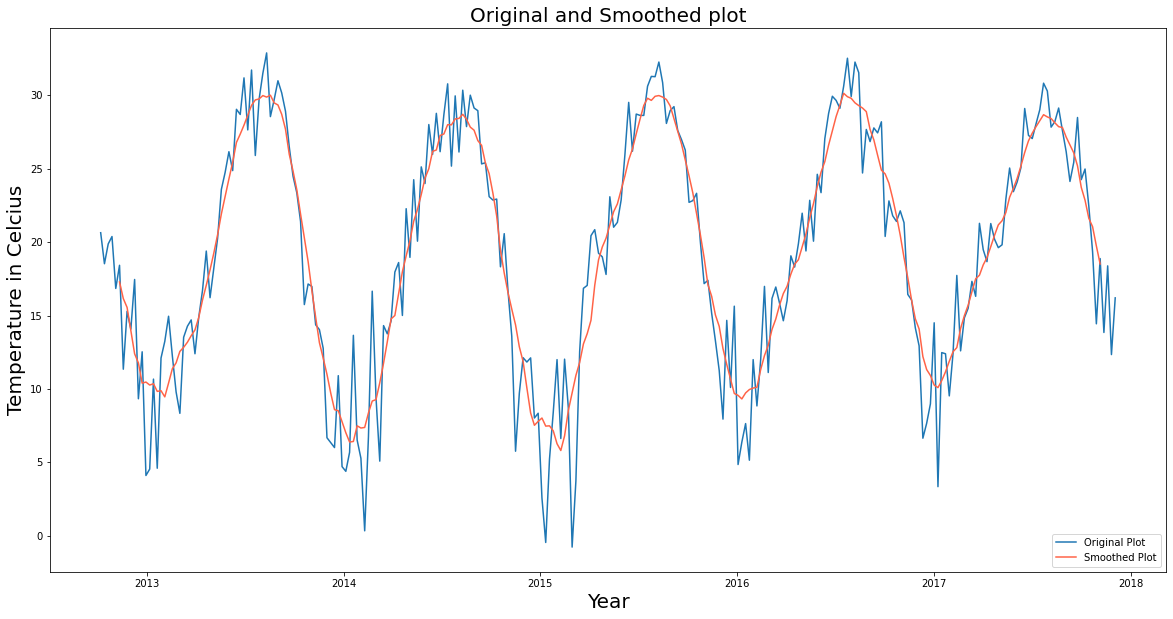

In [22]:
#window defines the number of raw observations used to calculate the moving average value.Here I am taking window size as 10
rolling_df['rolling_dallas'] = rolling_df['Dallas'].rolling(10,center=True).mean()
fig=plt.figure(figsize=(20,10));
ax=fig.add_subplot(111);
ax.plot(rolling_df['Dallas'],label='Original Plot')
ax.plot(rolling_df['rolling_dallas'],label='Smoothed Plot',c='tomato')
ax.legend(loc='lower right')
ax.set_title('Original and Smoothed plot')
ax.set_xlabel('Year')
ax.title.set_size(20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.set_ylabel('Temperature in Celcius');

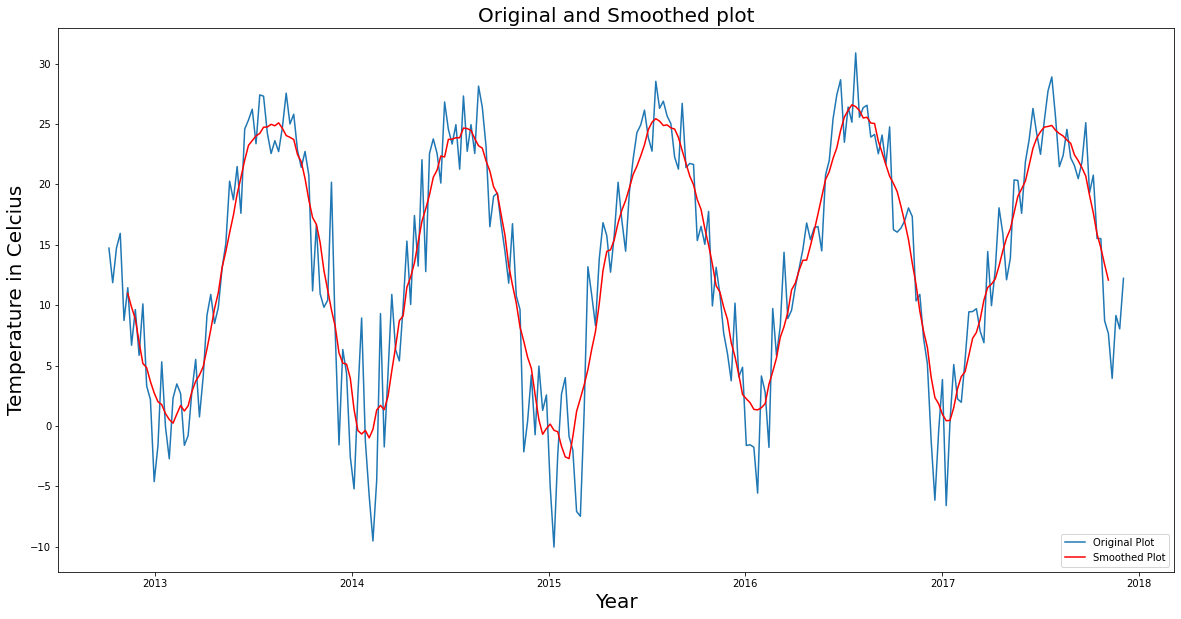

In [24]:
rolling_df['rolling_kansas'] = rolling_df['Kansas City'].rolling(10,center=True).mean()
fig=plt.figure(figsize=(20,10));
ax=fig.add_subplot(111);
ax.plot(rolling_df['Kansas City'],label='Original Plot')
ax.plot(rolling_df['rolling_kansas'],label='Smoothed Plot',c='r')
ax.legend(loc='lower right')
ax.set_title('Original and Smoothed plot')
ax.set_xlabel('Year')
ax.title.set_size(20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.set_ylabel('Temperature in Celcius');

In [319]:
# From the plot we can see how rolling average smoothens our data. 


### Explain how rolling average differs from moving average (MA) model.

* MA model uses past and current errors to estimate the current value. Moving average follows the prevailing trend,smooth the normal fluctuations of the data.

* A Rolling Moving Average is an additional type of Moving Average. This method gives recent values most weighting and less weighting further back in time. The main purpose of this function is smoothing out the function. 

* Compare to other average types like MA(Moving AVerage),EMA(Exponentionally Moving Average), Rolling Moving Average appears to be smoothest when plotted the graph.

## 7.Perform SARIMA on five cities, iterating through the cities programmatically. Explain your results. Graph the predicted values 30 days out.


In [44]:
#Taking five cities after the comparison
sarima_df = celcius_df.loc[:,['Las Vegas','Phoenix','Denver','Minneapolis','Chicago']]

In [2]:
#importing neccessary modules for sarimax
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

                                     SARIMAX Results                                      
Dep. Variable:                     diff_Las Vegas   No. Observations:                  262
Model:             SARIMAX(5, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -738.828
Date:                            Tue, 07 Dec 2021   AIC                           1493.655
Time:                                    19:29:55   BIC                           1521.795
Sample:                                12-02-2012   HQIC                          1504.982
                                     - 12-03-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3162      0.059    -22.296      0.000      -1.432      -1.201
ar.L2         -1.3955      0.089   

                                     SARIMAX Results                                      
Dep. Variable:                       diff_Chicago   No. Observations:                  262
Model:             SARIMAX(5, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -774.076
Date:                            Tue, 07 Dec 2021   AIC                           1564.152
Time:                                    19:30:01   BIC                           1592.291
Sample:                                12-02-2012   HQIC                          1575.478
                                     - 12-03-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3420      0.054    -24.706      0.000      -1.448      -1.236
ar.L2         -1.3838      0.074   

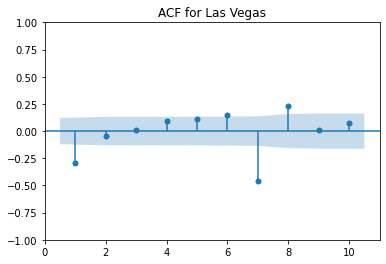

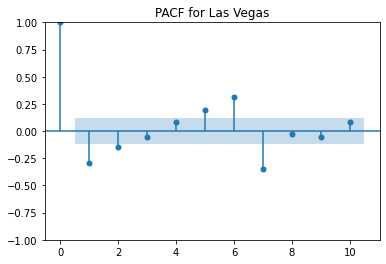

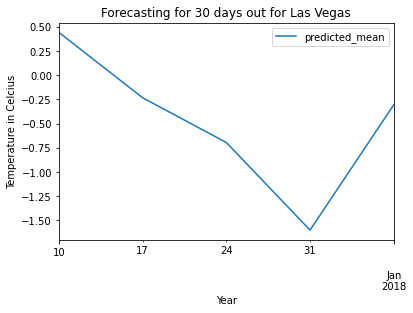

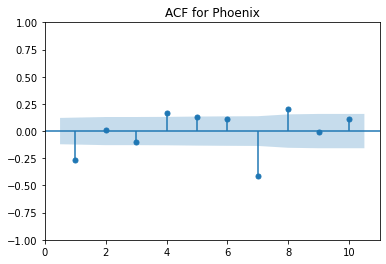

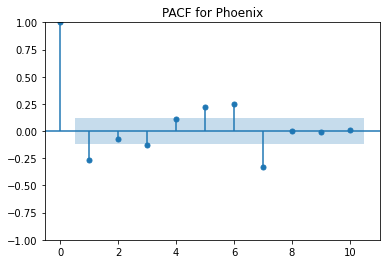

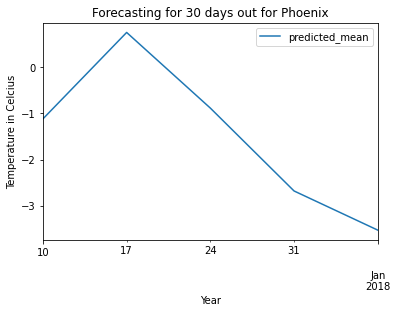

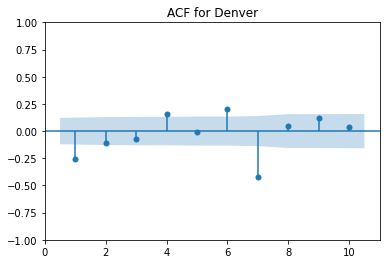

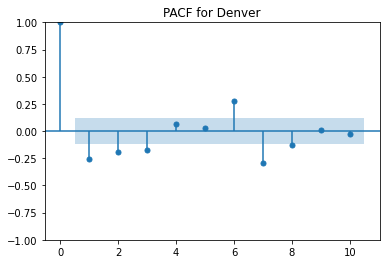

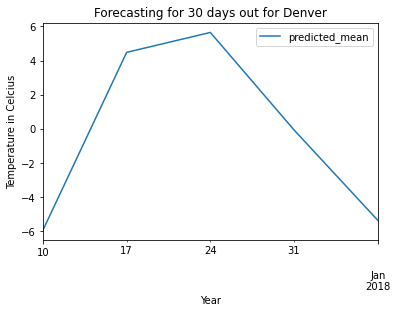

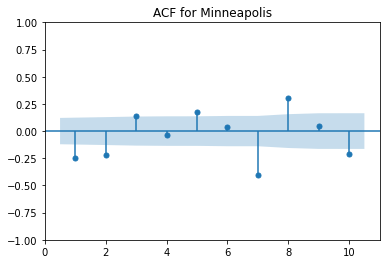

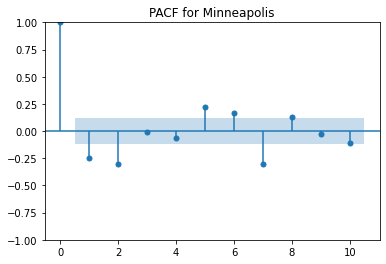

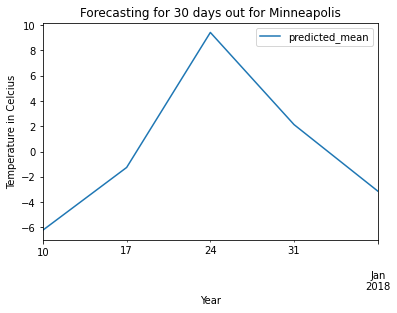

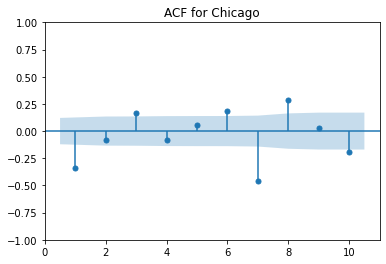

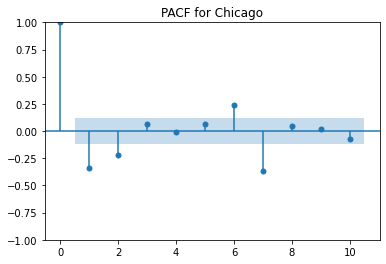

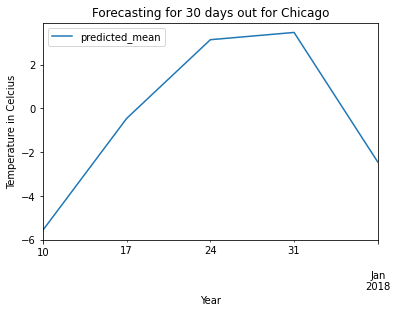

In [43]:
sarima_diff=sarima_df.copy(deep=False)

for i in sarima_df:
    #converting non stationary into stationary by taking seasonal and non seasonal difference
    #sarima_df[i].plot()
    sarima_diff["diff_"+i]=sarima_df[i].diff().diff(7).dropna()
    sarima_diff=sarima_diff.dropna()
    #plotting acf,pacf
    plot_acf(sarima_diff[["diff_"+i]],zero=False,lags=10,missing='drop',title="ACF for "+i);
    plot_pacf(sarima_diff[["diff_"+i]],lags=10,method='ywm',title="PACF for "+i);
    #creating SARIMA model
    model=SARIMAX(sarima_diff["diff_"+i],order=(5,1,0),seasonal_order=(2,1,0,12))
    fitting_model=model.fit()
    print(fitting_model.summary())
    #forecasting for next 30 days
    forecast_df=pd.DataFrame(fitting_model.forecast(steps=5))
    forecast_df.plot()
    plt.title("Forecasting for 30 days out for "+i)
    plt.xlabel('Year')
    plt.ylabel('Temperature in Celcius')

## 8.Explain what you see when you perform results.summary() on the cities in question 7. 


* The coefficient column represents the numeric values with constant and coefficients.Second column contains the standard errors it's a measure of how far away on average the models predictions are from the true values.Z column contains test statistics for significance with the p-values. The last two columns represent the critical values for the 95% confidence interval


* ARIMA(5,1,0)(2,1,0,12) model: The coefficients of AR is less than 1 ,the sum of the coefficients of the AR terms is less than one. 


* AIC(Akaike information criterion) is used to find which model is best. If we have small AIC value, then that is our model.Compare to other methods which I have tried, this model AIC values are less and log likelihood value is high. This seems to be a good model



* BIC(Bayesian information criterion ) is a criterion for model selection among a finite set of models. When comparing the BIC and AIC, penalty for additional parameters is more in BIC than AIC.



* Hannan–Quinn information criterion (HQIC) is an alternative to (AIC) and (BIC).

## Bonus:
### What do GARCH and ARCH Stand for? Break down and explain each piece in the names. Explain the difference between the two. Create a GARCH and ARCH model on the same 5 cities from question 6. Explain and graph the results.

ARCH - AutoRegressive Conditional Heteroscedasticity 


GARCH -Generalized AutoRegressive Conditional Heteroscedasticity

* Heteroscedasticity comes from ancient greek. It means different dispersion. Here the different dispersion of measurements are standard deviation and variance.

* Conditional- It means a value that depends on others

* AutoRegressive- using past values to measure variance

* We can pass only past squared errors in ARCH model. If we add past conditional variations to arch model, that is GARCH model.

* These models helps us to calculate **volatility(numeric measurement of uncertainity)** which is a parameter that Investors wanted to know before they invest in large investments. Measuring volatility always prevents Investors safe from big unpredicted shocks.

#### Difference between GARCH and ARCH

**In ARCH model, conditional variance is specified from past sample variance only.** 

**Instead of specifying exactly what the variance is going to be at each particular time, GARCH allows past conditional variances to enter as well.**

In [212]:
import arch
from arch import arch_model
from arch.__future__ import reindexing

arch_df= celcius_df.loc[:,['datetime','Las Vegas','Phoenix','Denver','Minneapolis','Chicago']]
arch_df= arch_df.set_index('datetime')
arch_df= arch_df.resample('W').mean()
arch_df

,Las Vegas,Phoenix,Denver,Minneapolis,Chicago
datetime,,,,,
2012-10-07,26.089290,27.728000,9.831613,11.189548,13.345677
2012-10-14,20.792560,24.593333,9.010357,6.788155,9.236429
2012-10-21,20.793393,24.469345,12.702262,9.772917,11.990952
2012-10-28,17.902917,22.128095,7.691071,8.605060,13.710298
2012-11-04,17.326310,21.392500,10.028036,2.513333,5.937500
...,...,...,...,...,...
2017-11-05,19.435536,21.245893,6.259107,1.322857,6.588274
2017-11-12,15.916369,20.552500,2.393750,-2.864107,1.827560
2017-11-19,14.668988,19.791607,7.646131,0.841548,3.943274


Optimization terminated successfully    (Exit mode 0)
            Current function value: 1301.8887925403205
            Iterations: 4
            Function evaluations: 16
            Gradient evaluations: 4
                      Constant Mean - ARCH Model Results                      
Dep. Variable:       ReturnsLas Vegas   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1301.89
Distribution:                  Normal   AIC:                           2609.78
Method:            Maximum Likelihood   BIC:                           2620.56
                                        No. Observations:                  269
Date:                Wed, Dec 08 2021   Df Residuals:                      268
Time:                        12:33:19   Df Model:                            1
                               Mean Model                               
        

C:\Users\Codergirl\AppData\Local\Programs\Python\Python37\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.981e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
C:\Users\Codergirl\AppData\Local\Programs\Python\Python37\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.981e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by s


Iteration:      5,   Func. Count:     27,   Neg. LLF: 1830.9336615010598
Iteration:     10,   Func. Count:     52,   Neg. LLF: 1819.4610128222623
Iteration:     15,   Func. Count:     77,   Neg. LLF: 1819.4608603605552
Iteration:     20,   Func. Count:    102,   Neg. LLF: 1819.439306711065
Iteration:     25,   Func. Count:    127,   Neg. LLF: 1816.9776287057314
Iteration:     30,   Func. Count:    154,   Neg. LLF: 1801.2895132626581
Iteration:     35,   Func. Count:    179,   Neg. LLF: 1804.3584511782014
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1801.2604153246718
            Iterations: 36
            Function evaluations: 188
            Gradient evaluations: 36
                     Constant Mean - GARCH Model Results                      
Dep. Variable:          ReturnsDenver   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   L

C:\Users\Codergirl\AppData\Local\Programs\Python\Python37\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.019e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
C:\Users\Codergirl\AppData\Local\Programs\Python\Python37\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.019e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by

Iteration:      5,   Func. Count:     28,   Neg. LLF: 2241.760827445871
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2241.760827444832
            Iterations: 6
            Function evaluations: 36
            Gradient evaluations: 6
                     Constant Mean - GARCH Model Results                      
Dep. Variable:     ReturnsMinneapolis   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2241.76
Distribution:                  Normal   AIC:                           4491.52
Method:            Maximum Likelihood   BIC:                           4505.90
                                        No. Observations:                  269
Date:                Wed, Dec 08 2021   Df Residuals:                      268
Time:                        12:33:20   Df Model:                            1
          

C:\Users\Codergirl\AppData\Local\Programs\Python\Python37\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.145e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
C:\Users\Codergirl\AppData\Local\Programs\Python\Python37\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.145e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by

Iteration:      5,   Func. Count:     27,   Neg. LLF: 2257.590552228247
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2257.590552228182
            Iterations: 5
            Function evaluations: 27
            Gradient evaluations: 5
                     Constant Mean - GARCH Model Results                      
Dep. Variable:         ReturnsChicago   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2257.59
Distribution:                  Normal   AIC:                           4523.18
Method:            Maximum Likelihood   BIC:                           4537.56
                                        No. Observations:                  269
Date:                Wed, Dec 08 2021   Df Residuals:                      268
Time:                        12:33:20   Df Model:                            1
          

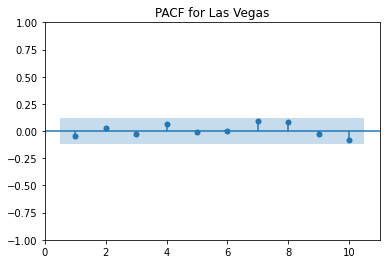

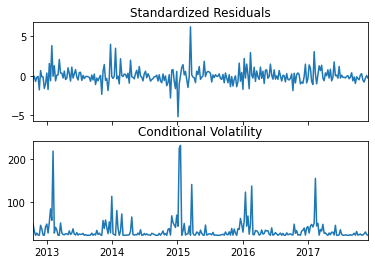

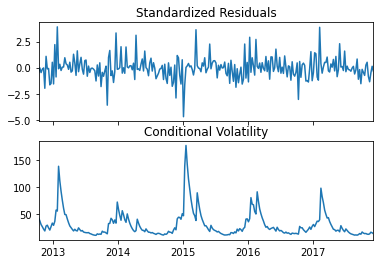

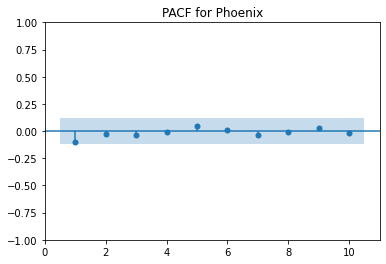

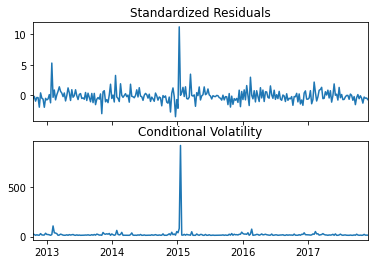

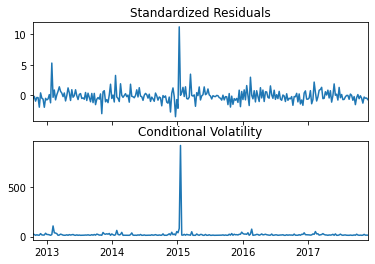

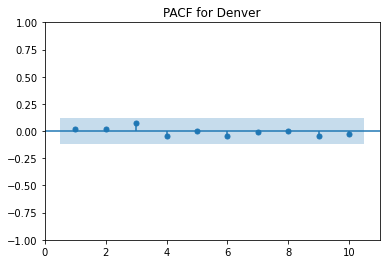

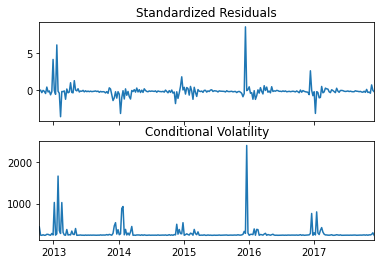

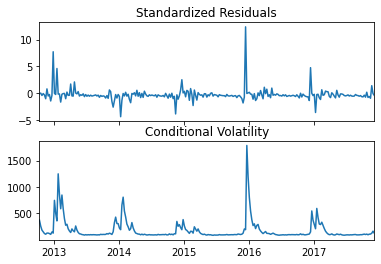

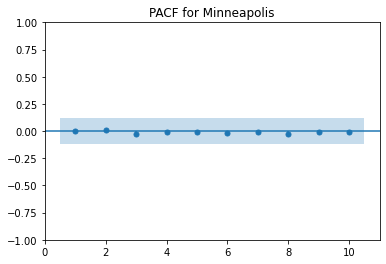

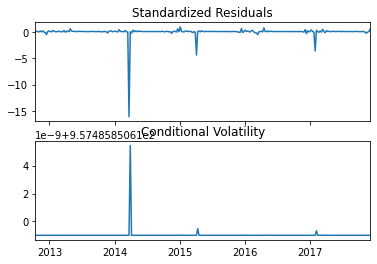

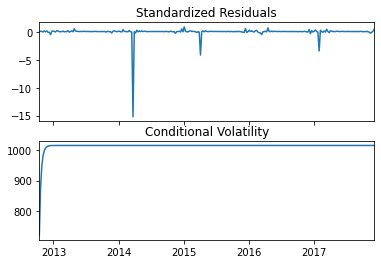

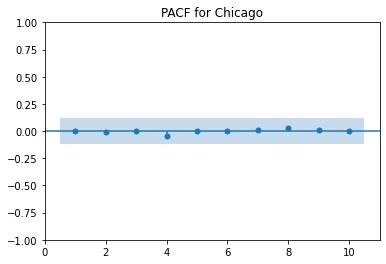

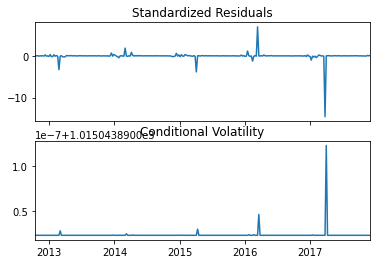

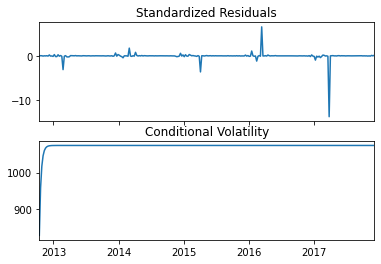

In [221]:
arch_dff=arch_df.copy(deep=False)

for i in arch_df:
    #calculating returns
    arch_dff["Returns"+i]=arch_df[i].pct_change()*100
    #plotting acf,pacf
    arch_dff.dropna()
    plot_pacf(arch_dff["Returns"+i].iloc[1:],lags=10,zero=False,method='ywm',title="PACF for "+i)
    #creating ARCH model
    model_arch = arch_model(arch_dff["Returns"+i].iloc[1:], p = 1, mean='Constant', vol = 'ARCH')
    fitting_arch= model_arch.fit(update_freq = 5)
    print(fitting_arch.summary())
    fitting_arch.plot()
    #creating GARCH model
    model_garch = arch_model(arch_dff["Returns"+i].iloc[1:], p = 1,q = 1, mean='Constant', vol = 'GARCH')
    fitting_garch= model_garch.fit(update_freq = 5)
    print(fitting_garch.summary())
    fitting_garch.plot()
    #forcasting arch model
    arch_forecast= fitting_arch.forecast(horizon=4)
    print(arch_forecast.residual_variance[-1:])
    #forcasting garch model
    garch_forecast= fitting_garch.forecast(horizon=4)
    print(garch_forecast.residual_variance[-1:])
   

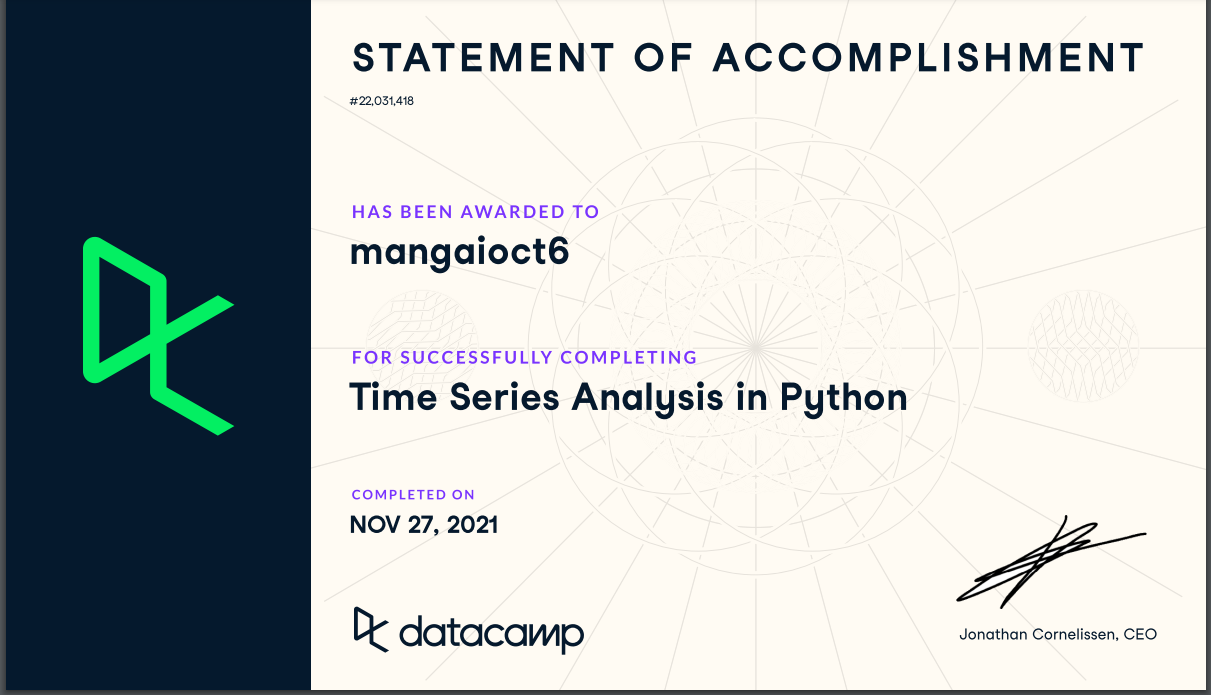